In [23]:
#Importing required libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

In [3]:
ad = pd.read_csv('Advertising.csv')

In [4]:
ad.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [5]:
ad=ad.drop(columns=['Unnamed: 0'])
ad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
w_missing = ad.isna().sum()
w_missing

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
data = ad.drop_duplicates()
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


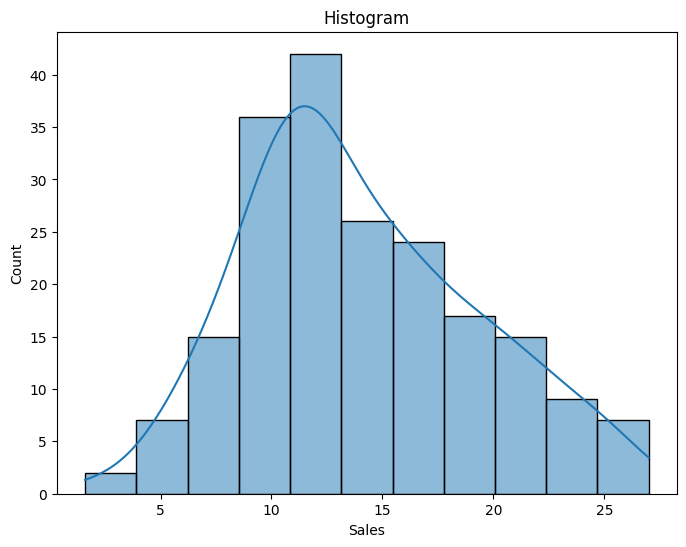

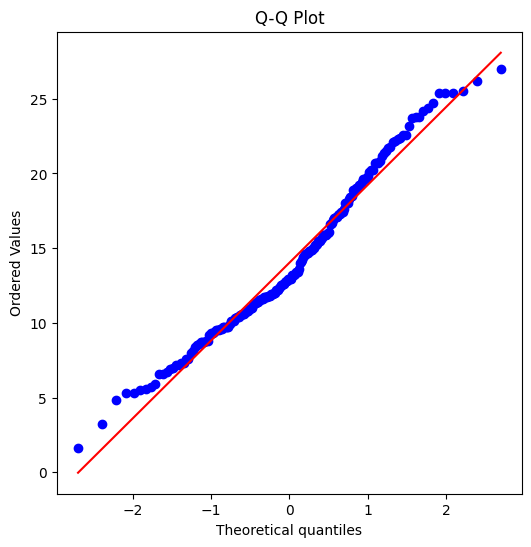

Shapiro-Wilk Test:
Test statistic: 0.9760257005691528
p-value: 0.001682588830590248
The dataset is not normally distributed.

Kolmogorov-Smirnov Test:
Test statistic: 0.9943128620620841
p-value: 0.0
The dataset is not normally distributed.

Anderson-Darling Test:
Test statistic: 1.7372831657847314
Critical values: [0.565 0.644 0.772 0.901 1.071]
Significance levels: [15.  10.   5.   2.5  1. ]
The dataset is not normally distributed.

Normality Test:
Test statistic: 7.343618933346309
p-value: 0.025430412805360583
The dataset is not normally distributed.


In [9]:
#Checking if our dataset is normally distributed
target = data['Sales']

# Visual inspection: Histogram
plt.figure(figsize=(8, 6))
sns.histplot(target, kde=True)
plt.title('Histogram')
plt.show()

# Visual inspection: Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(target, plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Shapiro-Wilk test
statistic, p_value = stats.shapiro(target)
alpha = 0.05  # Significance level

print("Shapiro-Wilk Test:")
print("Test statistic:", statistic)
print("p-value:", p_value)

if p_value > alpha:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

# Kolmogorov-Smirnov test
ks_statistic, ks_p_value = stats.kstest(target, 'norm')

print("\nKolmogorov-Smirnov Test:")
print("Test statistic:", ks_statistic)
print("p-value:", ks_p_value)

if ks_p_value > alpha:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

# Anderson-Darling test
ad_statistic, ad_critical_values, ad_significance_levels = stats.anderson(target, dist='norm')

print("\nAnderson-Darling Test:")
print("Test statistic:", ad_statistic)
print("Critical values:", ad_critical_values)
print("Significance levels:", ad_significance_levels)

if ad_statistic < ad_critical_values[2]:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

# Normality test using normaltest
normaltest_statistic, normaltest_p_value = stats.normaltest(target)

print("\nNormality Test:")
print("Test statistic:", normaltest_statistic)
print("p-value:", normaltest_p_value)

if normaltest_p_value > alpha:
    print("The dataset is normally distributed.")
else:
    print("The dataset is not normally distributed.")

In [10]:
scaler=MinMaxScaler()
columns_to_normalize = ['TV','Radio','Newspaper']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,22.1
1,0.148123,0.792339,0.394019,10.4
2,0.055800,0.925403,0.606860,9.3
3,0.509976,0.832661,0.511873,18.5
4,0.609063,0.217742,0.510994,12.9
...,...,...,...,...
195,0.126818,0.074597,0.118734,7.6
196,0.316199,0.098790,0.068602,9.7
197,0.596212,0.187500,0.053650,12.8
198,0.956713,0.846774,0.579595,25.5


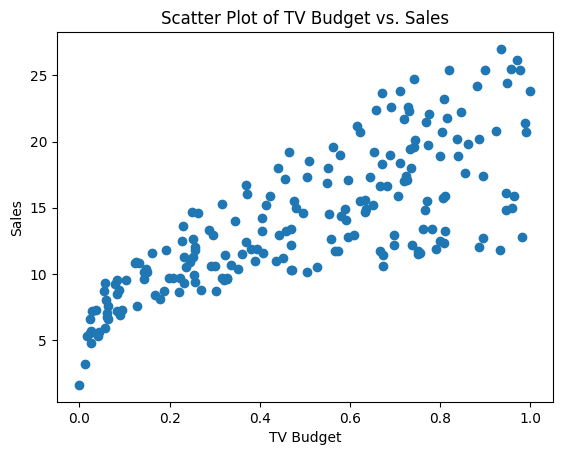

In [11]:
plt.scatter(data['TV'], data['Sales'])
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.title('Scatter Plot of TV Budget vs. Sales')
plt.show()


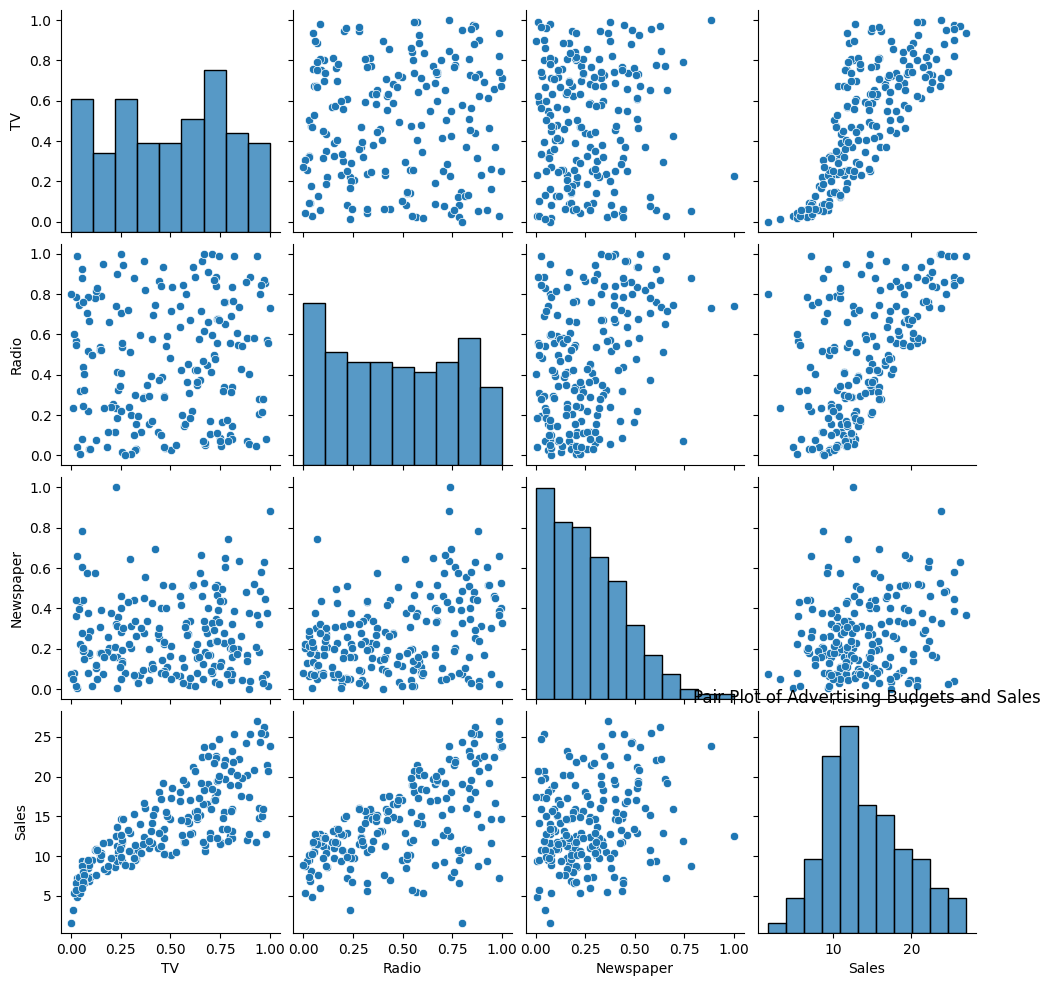

In [14]:
sns.pairplot(data[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.title('Pair Plot of Advertising Budgets and Sales')
plt.show()

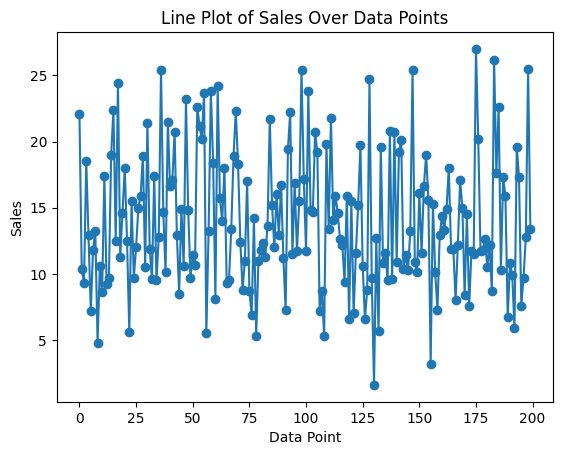

In [15]:

plt.plot(data.index, data['Sales'], marker='o', linestyle='-')
plt.xlabel('Data Point')
plt.ylabel('Sales')
plt.title('Line Plot of Sales Over Data Points')
plt.show()


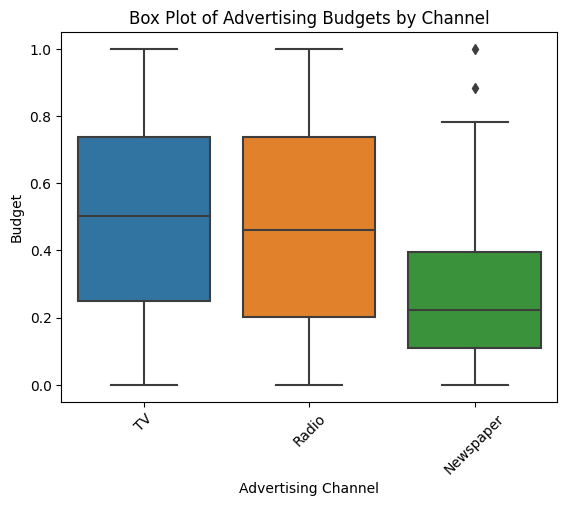

In [16]:
sns.boxplot(data=data[['TV', 'Radio', 'Newspaper']])
plt.xlabel('Advertising Channel')
plt.ylabel('Budget')
plt.title('Box Plot of Advertising Budgets by Channel')
plt.xticks(rotation=45)
plt.show()

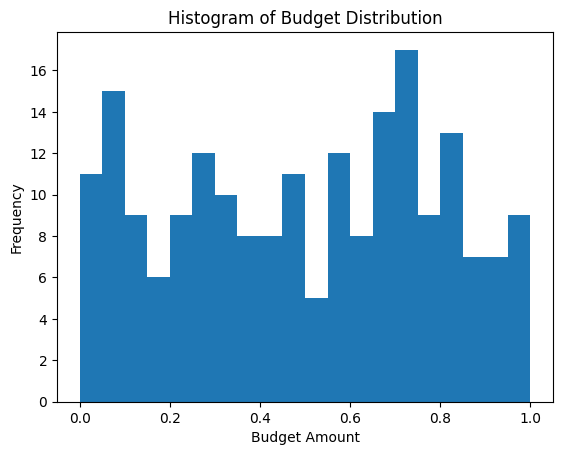

In [17]:
plt.hist(data['TV'], bins=20)
plt.xlabel('Budget Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Budget Distribution')
plt.show()

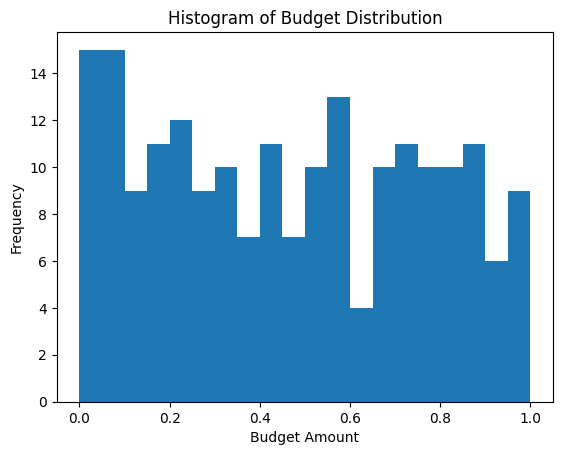

In [18]:
plt.hist(data['Radio'], bins=20)
plt.xlabel('Budget Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Budget Distribution')
plt.show()

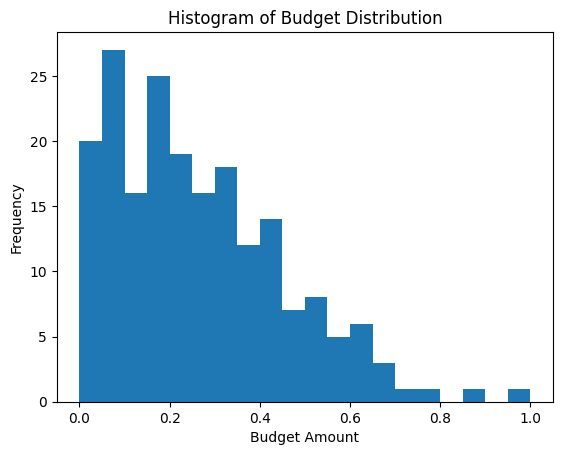

In [19]:
plt.hist(data['Newspaper'], bins=20)
plt.xlabel('Budget Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Budget Distribution')
plt.show()

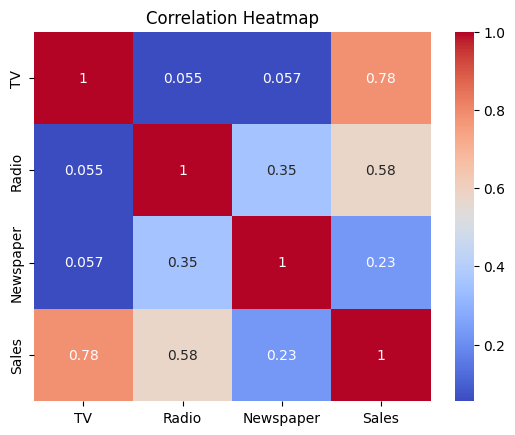

In [12]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [21]:
y=data['Sales']
X=data.drop(['Sales'],axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 3.17
Mean Absolute Error (MAE): 1.46
R-squared (R2): 0.90


In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.4129102285379007
R-squared: 0.9869181490609604


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_modell = RandomForestRegressor(n_estimators=100, random_state=42)
rf_modell.fit(X_train, y_train)
y_pred_rf = rf_modell.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)

Random Forest Mean Squared Error: 0.5912659499999988
Random Forest R-squared: 0.9812674705331994


In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR Mean Squared Error:", mse_svr)
print("SVR R-squared:", r2_svr)

SVR Mean Squared Error: 4.7382702426193095
SVR R-squared: 0.849881788488698


polynomial regression gives the best results. data maybe non linear